In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LinearRegression

# Copying logitudinal phase oscillation data

In [2]:
dist_data =  np.array([
        47.7,
        48.4,
        66.1,
        84.0,
        84.9,
        87.2,
        88.9,
        90.6,
        94.2,
        96.0,
        97.9,
        101.8,
        103.8,
        105.8,
        108.0,
        110.0,
        114.3,
        116.6,
        118.8,
        121.1,
        123.4,
        125.7,
        128.0,
        130.4,
        132.8,
        135.2,
        137.7,
        140.1,
        142.6,
        145.2])

device_names = np.array([
        'L:BPM3OF(R)'
        'L:BPM4IF(R)'
        'L:BPM5IF(R)'
        'L:D02BF(R)'
        'L:D03BF(R)'
        'L:D11BF(R)'
        'L:D12BF(R)'
        'L:D13BF(R)'
        'L:D21BF(R)'
        'L:D22BF(R)'
        'L:D23BF(R)'
        'L:D31BF(R)'
        'L:D32BF(R)'
        'L:D33BF(R)'
        'L:D34BF(R)'
        'L:D41BF(R)'
        'L:D43BF(R)'
        'L:D44BF(R)'
        'L:D51BF(R)'
        'L:D52BF(R)'
        'L:D53BF(R)'
        'L:D54BF(R)'
        'L:D61BF(R)'
        'L:D62BF(R)'
        'L:D63BF(R)'
        'L:D64BF(R)'
        'L:D71BF(R)'
        'L:D72BF(R)'
        'L:D73BF(R)'
        'L:D74BF(R)'
])

In [3]:
buncher = np.array([
        -0.484,
        -0.368,
        0.171,
        -0.004249,
        0.056,
        0.167,
        0.144,
        0.033,
        -0.135,
        -0.108,
        -0.02,
        0.151,
        0.133,
        0.043,
        -0.046,
        -0.104,
        -0.057,
        0.006016,
        0.067,
        0.105,
        0.131,
        0.12,
        0.065,
        -0.009679,
        -0.076,
        -0.121,
        -0.151,
        -0.14,
        -0.114,
        -0.088
])

T1 = np.array([
        -0.111,
        -0.048,
        0.376,
        -0.275,
        -0.207,
        0.014,
        0.146,
        0.172,
        -0.077,
        -0.161,
        -0.183,
        0.047,
        0.132,
        0.15,
        0.068,
        -0.055,
        -0.16,
        -0.135,
        -0.079,
        -0.012,
        0.063,
        0.112,
        0.111,
        0.074,
        0.018,
        -0.06,
        -0.122,
        -0.161,
        -0.188,
        -0.186 
])

T2 = np.array([
        0.759,
        0.553,
        -0.621,
        0.306,
        0.137,
        -0.218,
        -0.335,
        -0.209,
        0.263,
        0.32,
        0.201,
        -0.208,
        -0.317,
        -0.214,
        -0.02,
        0.198,
        0.262,
        0.135,
        -0.018,
        -0.135,
        -0.236,
        -0.283,
        -0.219,
        -0.071,
        0.099,
        0.227,
        0.285,
        0.359,
        0.366,
        0.337 
])

T3 = np.array([
        -0.02,
        0.188,
        0.168,
        -0.202,
        -0.186,
        -0.088,
        0.036,
        0.125,
        0.047,
        -0.048,
        -0.11,
        -0.046,
        0.067,
        0.093,
        0.082,
        0.026,
        -0.092,
        -0.106,
        -0.115,
        -0.068,
        -0.025,
        0.017,
        0.061,
        0.068,
        0.052,
        0.015,
        -0.011,
        -0.076,
        -0.094,
        -0.118    
])

T4 = np.array([
        0.037,
        -0.026,
        0.875,
        -0.372,
        -0.128,
        0.401,
        0.508,
        0.28,
        -0.416,
        -0.481,
        -0.277,
        0.356,
        0.492,
        0.298,
        -0.037,
        -0.325,
        -0.355,
        -0.167,
        0.075,
        0.259,
        0.389,
        0.44,
        0.315,
        0.077,
        -0.175,
        -0.371,
        -0.429,
        -0.523,
        -0.529,
        -0.484
])

T5 = np.array([
        0.011,
        0.007257,
        -0.03,
        1.162,
        0.783,
        -0.254,
        -0.791,
        -0.758,
        0.482,
        0.839,
        0.744,
        -0.339,
        -0.809,
        -0.696,
        -0.223,
        0.343,
        0.795,
        0.579,
        0.285,
        -0.1,
        -0.411,
        -0.61,
        -0.6,
        -0.318,
        0.058,
        0.411,
        0.647,
        0.877,
        0.981,
        1.011   
])

# Normalization

Find the coefficients by normalizing to the last 4 points of each oscillation

In [4]:
def find_norm_coeff(osc_data): return 1/max(osc_data[-4:]) if osc_data[-4] > 0 else 1/min(osc_data[-4:])

norm_buncher = buncher * find_norm_coeff(buncher)
norm_T1 = T1 * find_norm_coeff(T1)
norm_T2 = T2 * find_norm_coeff(T2)
norm_T3 = T3 * find_norm_coeff(T3)
norm_T4 = T4 * find_norm_coeff(T4)
norm_T5 = T5 * find_norm_coeff(T5)

norm_coeffs = [find_norm_coeff(buncher), find_norm_coeff(T1), find_norm_coeff(T2), find_norm_coeff(T3), find_norm_coeff(T4), find_norm_coeff(T5)]
pd.DataFrame(data = 
             {"Tank": ["T0", "T1", "T2", "T3", "T4", "T5"], 
              "Norm. coefficients": norm_coeffs})

,Tank,Norm. coefficients
0,T0,-6.622517
1,T1,-5.319149
2,T2,2.732240
3,T3,-8.474576
4,T4,-1.890359
5,T5,0.989120


# Plot oscillations

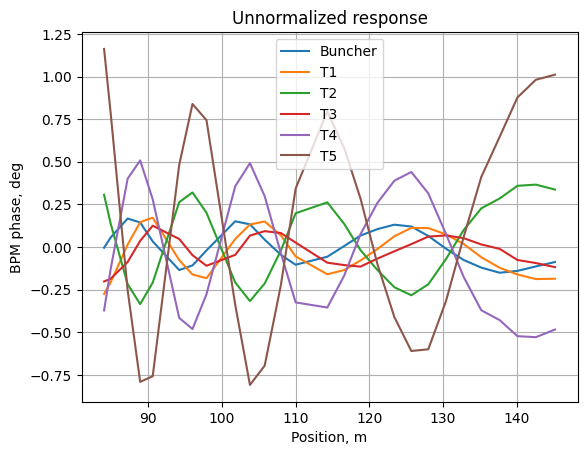

In [5]:
plt.plot(dist_data[3:], buncher[3:], label = 'Buncher')
plt.plot(dist_data[3:], T1[3:], label = 'T1')
plt.plot(dist_data[3:], T2[3:], label = 'T2')
plt.plot(dist_data[3:], T3[3:], label = 'T3')
plt.plot(dist_data[3:], T4[3:], label = 'T4')
plt.plot(dist_data[3:], T5[3:], label = 'T5')
plt.legend()
plt.xlabel('Position, m')
plt.ylabel('BPM phase, deg')
plt.title('Unnormalized response')
plt.grid()
plt.show()

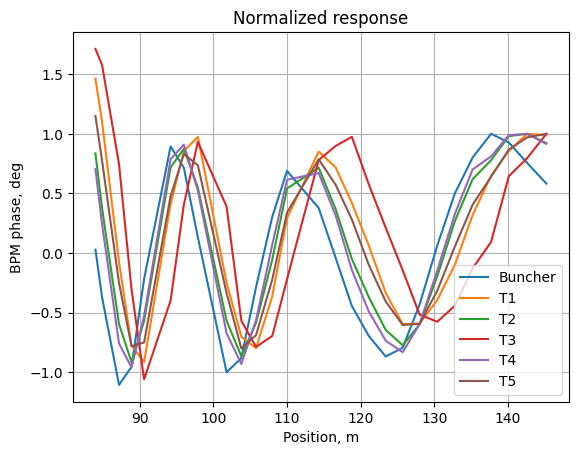

In [6]:
plt.plot(dist_data[3:], norm_buncher[3:], label = 'Buncher')
plt.plot(dist_data[3:], norm_T1[3:], label = 'T1')
plt.plot(dist_data[3:], norm_T2[3:], label = 'T2')
plt.plot(dist_data[3:], norm_T3[3:], label = 'T3')
plt.plot(dist_data[3:], norm_T4[3:], label = 'T4')
plt.plot(dist_data[3:], norm_T5[3:], label = 'T5')
plt.legend()
plt.xlabel('Position, m')
plt.ylabel('BPM phase, deg')
plt.title('Normalized response')
plt.grid()
plt.show()

# Find least correlation between oscillations

In [7]:
bases_options = list(itertools.combinations([norm_buncher, norm_T1, norm_T2, norm_T3, norm_T4, norm_T5], 2))
correlations = bases_options
for i in range(len(bases_options)): correlations[i] = np.correlate(bases_options[i][0], bases_options[i][1])

In [8]:
pd.DataFrame(data = 
             {"Tank basis combination": list(itertools.combinations([0, 1, 2, 3, 4, 5], 2)), 
              "Correlation": np.abs(np.array([c[0] for c in correlations]))})

#We see that (0, 3) is lowest

,Tank basis combination,Correlation
0,"(0, 1)",11.766841
1,"(0, 2)",22.551710
2,"(0, 3)",1.443853
3,"(0, 4)",13.022693
4,"(0, 5)",7.938227
5,"(1, 2)",16.253328
6,"(1, 3)",14.841958
7,"(1, 4)",14.224621
8,"(1, 5)",12.314747
9,"(2, 3)",7.300894


# Linear Fitting to (T0, T3) basis

In [9]:
def linear_fit_to_basis(osc_array, b_vec_1, b_vec_2): 
    X = np.column_stack((b_vec_1, b_vec_2))
    
    model = LinearRegression()
    model.fit(X, osc_array)
    
    return model.coef_

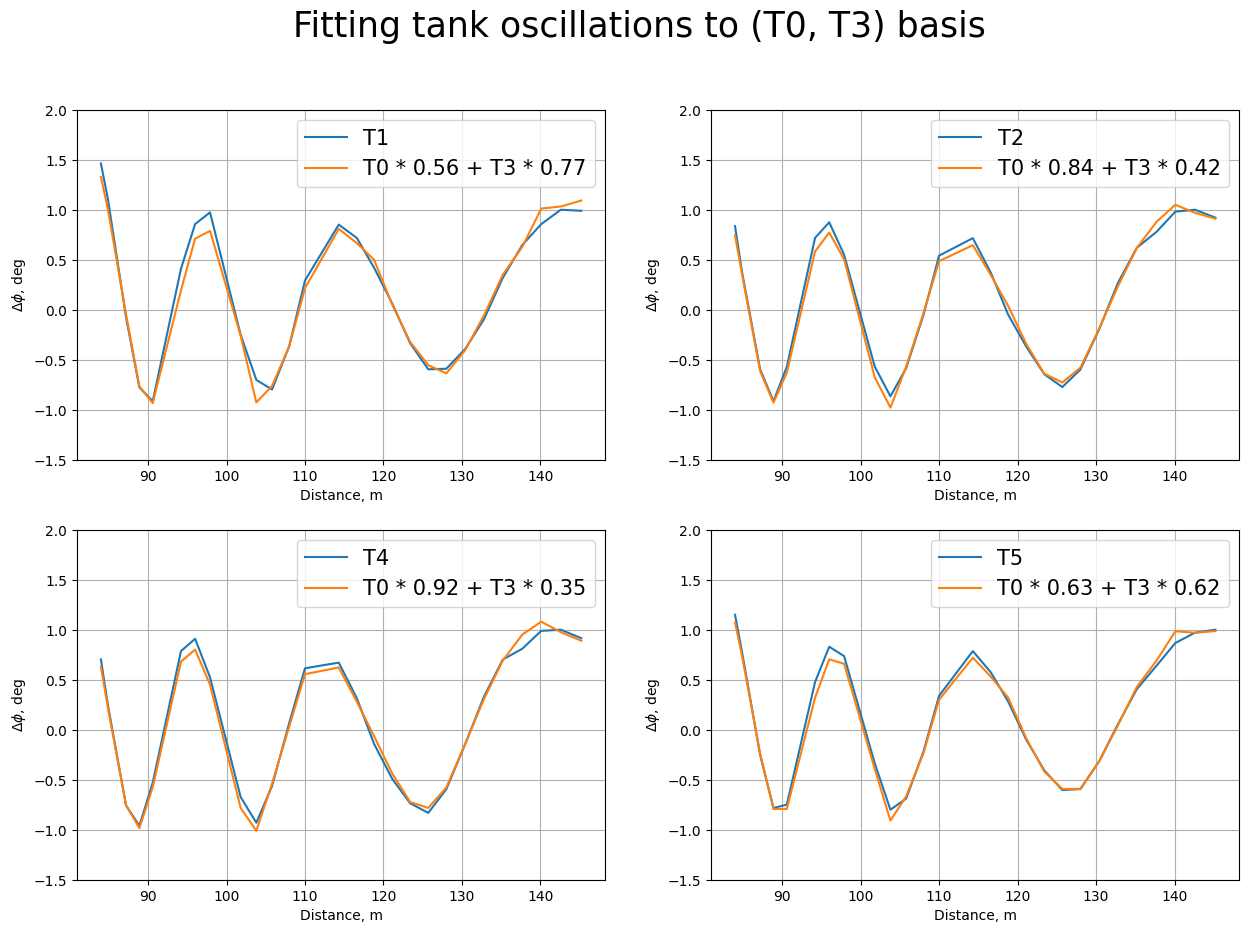

In [10]:
coeffs_T1 = linear_fit_to_basis(norm_T1[3:], norm_buncher[3:], norm_T3[3:])
coeffs_T2 = linear_fit_to_basis(norm_T2[3:], norm_buncher[3:], norm_T3[3:])
coeffs_T4 = linear_fit_to_basis(norm_T4[3:], norm_buncher[3:], norm_T3[3:])
coeffs_T5 = linear_fit_to_basis(norm_T5[3:], norm_buncher[3:], norm_T3[3:])


fig, axs = plt.subplots(2, 2, figsize = (15, 10))
fig.suptitle('Fitting tank oscillations to (T0, T3) basis', fontsize = 25)

axs[0, 0].plot(dist_data[3:], norm_T1[3:], label = 'T1')
axs[0, 0].plot(dist_data[3:], norm_buncher[3:] * coeffs_T1[0] + norm_T3[3:] * coeffs_T1[1], label = 'T0 * %.2f + T3 * %.2f'%tuple(coeffs_T1))

axs[0, 1].plot(dist_data[3:], norm_T2[3:], label = 'T2')
axs[0, 1].plot(dist_data[3:], norm_buncher[3:] * coeffs_T2[0] + norm_T3[3:] * coeffs_T2[1], label = 'T0 * %.2f + T3 * %.2f'%tuple(coeffs_T2))

axs[1, 0].plot(dist_data[3:], norm_T4[3:], label = 'T4')
axs[1, 0].plot(dist_data[3:], norm_buncher[3:] * coeffs_T4[0] + norm_T3[3:] * coeffs_T4[1], label = 'T0 * %.2f + T3 * %.2f'%tuple(coeffs_T4))

axs[1, 1].plot(dist_data[3:], norm_T5[3:], label = 'T5')
axs[1, 1].plot(dist_data[3:], norm_buncher[3:] * coeffs_T5[0] + norm_T3[3:] * coeffs_T5[1], label = 'T0 * %.2f + T3 * %.2f'%tuple(coeffs_T5))

for i, j in [[0, 0], [1, 0], [0, 1], [1, 1]]:
    axs[i, j].grid()
    axs[i, j].legend(fontsize = 15, loc = "upper right")
    axs[i, j].set_xlabel("Distance, m")
    axs[i, j].set_ylabel("$\Delta \phi$, deg")
    axs[i, j].set_ylim(-1.5, 2)

plt.show()

In [11]:
def RMSE(ar1, ar2): return np.sqrt(np.average(np.abs((ar1 - ar2)**2)))

RMSE_T1 = RMSE(norm_T1[3:], norm_buncher[3:] * coeffs_T1[0] + norm_T3[3:] * coeffs_T1[1])
RMSE_T2 = RMSE(norm_T2[3:], norm_buncher[3:] * coeffs_T2[0] + norm_T3[3:] * coeffs_T2[1])
RMSE_T4 = RMSE(norm_T4[3:], norm_buncher[3:] * coeffs_T4[0] + norm_T3[3:] * coeffs_T4[1])
RMSE_T5 = RMSE(norm_T5[3:], norm_buncher[3:] * coeffs_T5[0] + norm_T3[3:] * coeffs_T5[1])

pd.DataFrame(data = 
             {"Tank": ["T1", "T2", "T4", "T5"], 
              "Coefficients": [np.round(coeffs_T1, 3), np.round(coeffs_T2, 3), np.round(coeffs_T4, 3), np.round(coeffs_T5, 3)], 
              "RMS Errors": [RMSE_T1, RMSE_T2, RMSE_T4, RMSE_T5]})

,Tank,Coefficients,RMS Errors
0,T1,"[0.559, 0.766]",0.094780
1,T2,"[0.84, 0.421]",0.062320
2,T4,"[0.92, 0.353]",0.062662
3,T5,"[0.633, 0.617]",0.060164


# Extended fit for T1 and T2

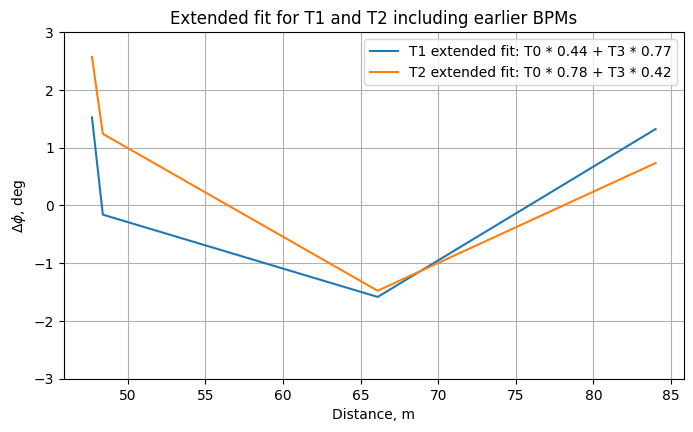

In [12]:
coeffs_T1_extended = linear_fit_to_basis(norm_T1, norm_buncher, norm_T3)
coeffs_T2_extended = linear_fit_to_basis(norm_T2, norm_buncher, norm_T3)

plt.figure(figsize = (16/2, 9/2))
plt.plot(dist_data[:4], norm_buncher[:4] * coeffs_T1_extended[0] + norm_T3[:4] * coeffs_T1_extended[1], label = 'T1 extended fit: T0 * %.2f + T3 * %.2f'%tuple(coeffs_T1_extended))
plt.plot(dist_data[:4], norm_buncher[:4] * coeffs_T2_extended[0] + norm_T3[:4] * coeffs_T2_extended[1], label = 'T2 extended fit: T0 * %.2f + T3 * %.2f'%tuple(coeffs_T2_extended))
plt.legend()
plt.grid()
plt.xlabel('Distance, m')
plt.ylabel('$\Delta \phi$, deg')
plt.title('Extended fit for T1 and T2 including earlier BPMs')
plt.ylim(-3, 3)
plt.show()